In [1]:
# imports
from collections import Counter
import re

In [2]:
# read data
# with open("../Data/Wikipedia300K/Wikipedia300K.txt", "r", encoding="utf-8") as file:
#     text = file.read()

with open("../Data/Wikipedia1M/Wikipedia1M.txt", "r", encoding="utf-8") as file:
    text = file.read()

In [3]:
# clean text (remove all non-ascii characters keep umlauts)

# first try
# text_cleaned = " ".join([c for c in text if ord(c) < 128 or c in "äöüÄÖÜß"])

# better solution
text_cleaned = re.sub(r"[^a-zA-Z0-9äöüÄÖÜß\.,!\?]", " ", text)

print("Unique characters: ", sorted(set(text)))
print("Unique characters: ", sorted(set(text_cleaned)))

Unique characters:  ['\n', ' ', '!', '"', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', '<', '>', '?', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', '`', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '~', '¡', '¢', '£', '¥', '§', '¨', 'ª', '«', '¬', '®', '°', '±', '²', '³', '´', 'µ', '¶', '·', '¸', '¹', 'º', '»', '¼', '½', '¾', '¿', 'À', 'Á', 'Ä', 'Å', 'Æ', 'Ç', 'È', 'É', 'Ê', 'Í', 'Î', 'Ï', 'Ð', 'Ñ', 'Ò', 'Ó', 'Ô', 'Õ', 'Ö', '×', 'Ø', 'Ú', 'Û', 'Ü', 'Þ', 'ß', 'à', 'á', 'â', 'ã', 'ä', 'å', 'æ', 'ç', 'è', 'é', 'ê', 'ë', 'ì', 'í', 'î', 'ï', 'ð', 'ñ', 'ò', 'ó', 'ô', 'õ', 'ö', '÷', 'ø', 'ù', 'ú', 'û', 'ü', 'ý', 'þ', 'ÿ', 'Ā', 'ā', 'ă', 'ą', 'Ć', 'ć', 'ĉ', 'Ċ', 'ċ', 'Č', 'č', 'Ď', 'ď', 'Đ', 'đ', 'Ē', 'ē', 'ĕ', 'Ė', 'ė', 'ę', 'Ě', 'ě', 'ĝ', 'Ğ', 'ğ', 'Ġ'

In [4]:
# example cleaned text
length = 200
print(text[0:length])
print("\n")
print(text_cleaned[0:length])

; 0,7 Prozent stammen von zwei oder mehr Ethnien ab.
"0 %" bedeutet, dass der Strahlengang frei ist, der Füllstand also unter der Grenze liegt.
; 0 kB), Video der ICTY-Sitzung vom 16. Juni 2005, http:


  0,7 Prozent stammen von zwei oder mehr Ethnien ab.  0    bedeutet, dass der Strahlengang frei ist, der Füllstand also unter der Grenze liegt.   0 kB , Video der ICTY Sitzung vom 16. Juni 2005, http 


In [5]:
# count words case insensitive
words = text_cleaned.lower().split()
word_counts = Counter(words)
# print(word_counts.most_common(10))

# token count
print("Number of tokens: ", len(words))

# calculate vocabulary size
print("Vocabulary size: ", len(word_counts))

Number of tokens:  15587991
Vocabulary size:  971943


Word Counts [556063, 517176, 416137]
Word Frequencies [0.03567252508677995, 0.033177848255108694, 0.026695999503720525]
Word Ranks [1 2 3]
Word Counts [0.03567252508677995, 0.016588924127554347, 0.008898666501240176]


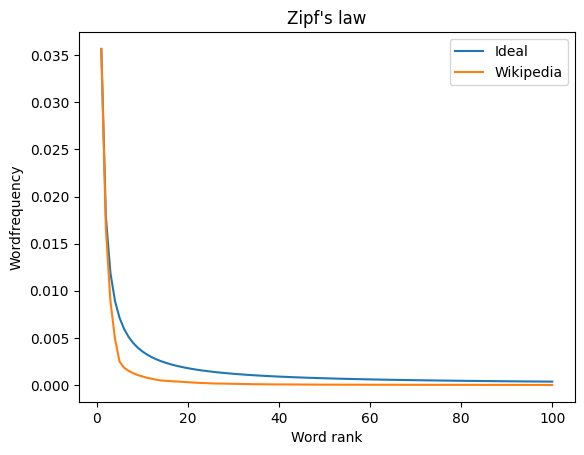

In [6]:
#Plot the Zipf's law curve for the 100 most frequent words.

# imports
import matplotlib.pyplot as plt
import numpy as np

# get top 100 words
top_100 = word_counts.most_common(100)

# get word counts
counts = [count for word, count in top_100]
print("Word Counts", counts[:3])

# get word frequencies
freqs = [count / len(words) for count in counts]
print("Word Frequencies", freqs[:3])

# get word ranks
ranks = np.arange(1, len(counts) + 1)
print("Word Ranks", ranks[:3])


# get Frequency of a word/character in relation to its rank
rel_freq = [freq / rank for rank, freq in zip(ranks, freqs)]
print("Word Counts", rel_freq[:3])

# p(n) = 1/n
ideal_counts = [ rel_freq[:1] / rank for rank in ranks]

#####################################################################################
# Plot the ideal Zipf's law curve with p(n) = 1/n. Normfactor is the number of tokens.
plt.plot(ranks, ideal_counts, label="Ideal")
plt.plot(ranks, rel_freq, label="Wikipedia", marker="")
plt.xlabel("Word rank")
plt.ylabel("Wordfrequency")
plt.title("Zipf's law")
plt.legend()
plt.show()

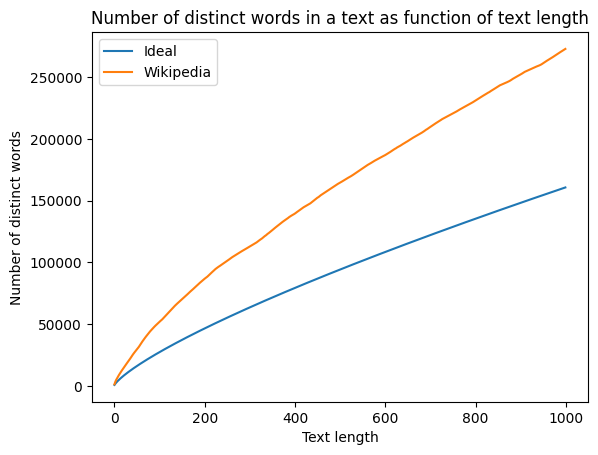

In [7]:
# Number of distinct words in a text as function of text length
# imports
import matplotlib.pyplot as plt
import numpy as np

max_count = len(text_cleaned.split())
iteration_step = max_count // 1000

# get text lengths
text_lengths = np.arange(iteration_step, max_count, iteration_step)

K = 0.4492544615448738 # 40 # 10 - 100
ß = 0.7720729298282094 # 0.5 # 0.4 - 0.6

# ideal number of distinct words
ideal_words = [K * (length ** ß) for length in text_lengths]

# number of distinct words
distinct_words = [len(set(text_cleaned[:length].split())) for length in text_lengths]

# # calculate K and ß
# K = distinct_words[0] / text_lengths[0] ** ß
# print("K: ", K)
# ß = np.log(distinct_words[-1] / distinct_words[0]) / np.log(text_lengths[-1] / text_lengths[0])
# print("ß: ", ß)
# K:  0.4492544615448738
# ß:  0.7720729298282094

# plot
plt.plot(ideal_words, label="Ideal")
plt.plot(distinct_words, label="Wikipedia")
plt.xlabel("Text length")
plt.ylabel("Number of distinct words")
plt.title("Number of distinct words in a text as function of text length")
plt.legend()
plt.show()